<a href="https://colab.research.google.com/github/masApippp/Klasifikasi-Decision-tree/blob/main/UAS_Data_Mining_Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree



In [57]:
df = pd.read_csv('StudentsPerformance.csv')


In [62]:
print("Contoh Data Awal:")
print(df.head())

Contoh Data Awal:
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   rata_rata  lulus  
0  72.666667      1  
1  82.333333      1  
2  92.666667      1  
3  49.333333      0  
4  76.333333      1  


In [63]:
df['rata_rata'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df['lulus'] = df['rata_rata'].apply(lambda x: 1 if x >= 60 else 0)


In [64]:
X = df[['math score', 'reading score', 'writing score']]
y = df['lulus']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
nvclassifier = DecisionTreeClassifier()
nvclassifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [68]:
y_pred = model.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Laporan:\n", classification_report(y_test, y_pred, target_names=["Tidak Lulus", "Lulus"]))



Akurasi: 0.965
Laporan:
               precision    recall  f1-score   support

 Tidak Lulus       0.90      1.00      0.95        62
       Lulus       1.00      0.95      0.97       138

    accuracy                           0.96       200
   macro avg       0.95      0.97      0.96       200
weighted avg       0.97      0.96      0.97       200



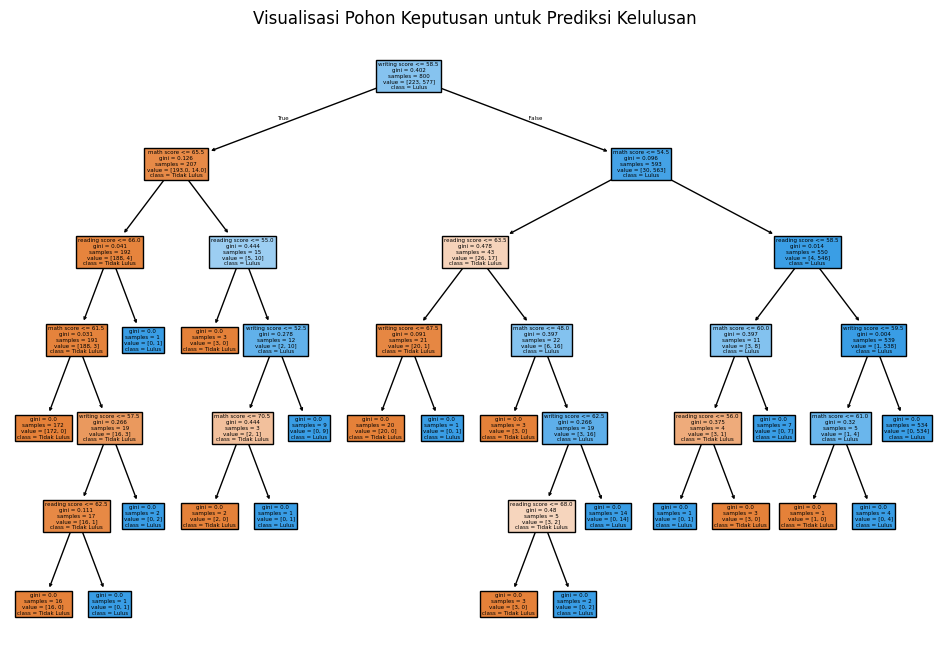

In [69]:
plt.figure(figsize=(12, 8))
plot_tree(nvclassifier,
          feature_names=['math score', 'reading score', 'writing score'],
          class_names=['Tidak Lulus', 'Lulus'],
          filled=True)
plt.title("Visualisasi Pohon Keputusan untuk Prediksi Kelulusan")
plt.show()